# TASK-01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Handling Missing Values
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True)

In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
# Dropping unneccessary features
df.drop(columns=['Name','Ticket'], inplace=True)

In [10]:
# Converting Categorical value to numerical
df['Sex'] = df['Sex'].map({'male':0,'female':1})   #LABEL ENCODING

In [11]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)   #ONE-HOT ENCODING

In [12]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,22.0,1,0,7.2500,False,True
1,2,1,1,1,38.0,1,0,71.2833,False,False
2,3,1,3,1,26.0,0,0,7.9250,False,True
3,4,1,1,1,35.0,1,0,53.1000,False,True
4,5,0,3,0,35.0,0,0,8.0500,False,True


In [13]:
# Standardizing and Normalizing numeric features
sc = StandardScaler()
num_cols = ['Age','Fare','SibSp','Parch']
df[num_cols] = sc.fit_transform(df[num_cols])

In [14]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,-0.592481,0.432793,-0.473674,-0.502445,False,True
1,2,1,1,1,0.638789,0.432793,-0.473674,0.786845,False,False
2,3,1,3,1,-0.284663,-0.474545,-0.473674,-0.488854,False,True
3,4,1,1,1,0.407926,0.432793,-0.473674,0.420730,False,True
4,5,0,3,0,0.407926,-0.474545,-0.473674,-0.486337,False,True


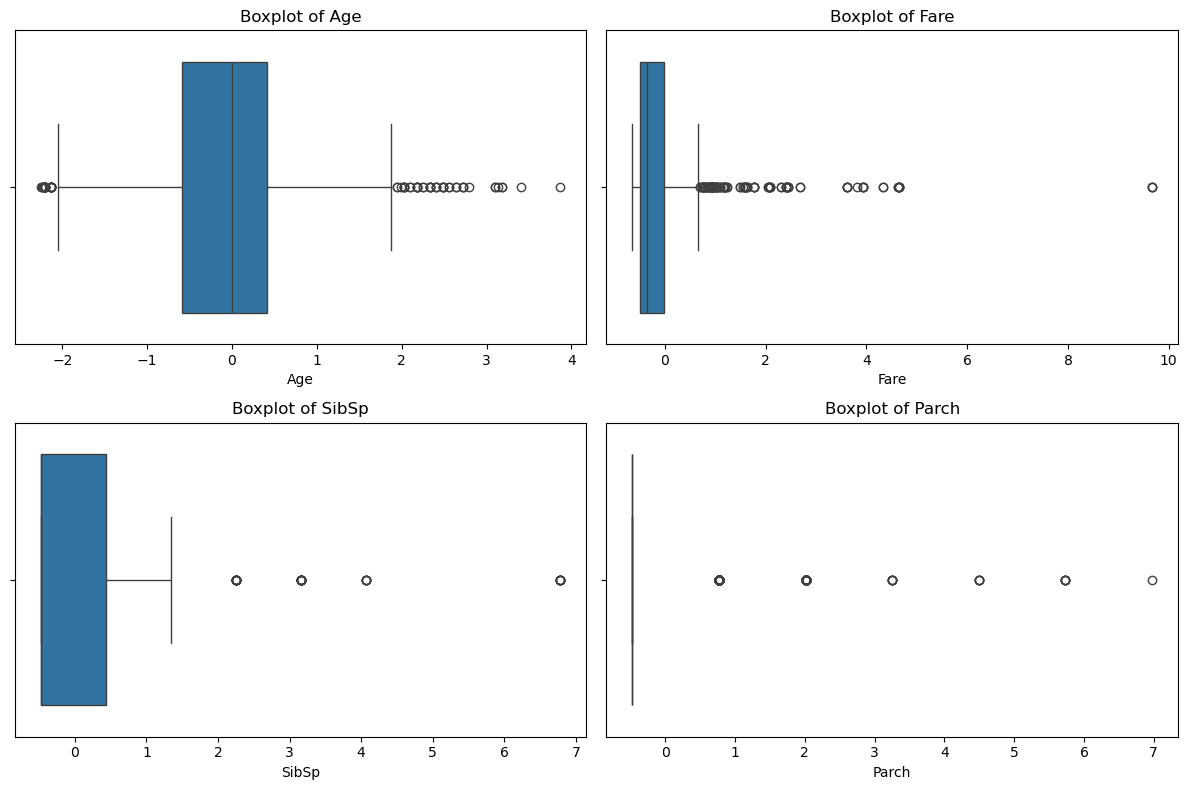

In [15]:
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [16]:
# Removing Outliers using IQR Method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

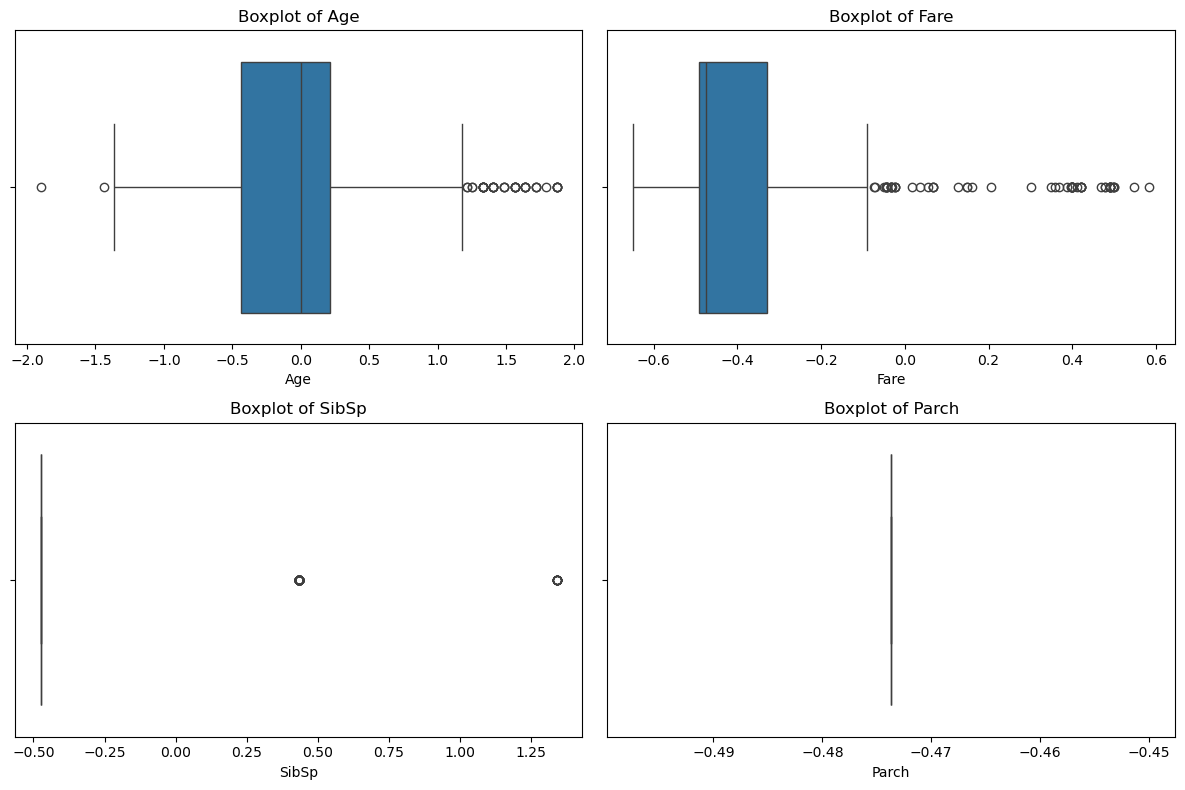

In [17]:
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,0,-0.592481,0.432793,-0.473674,-0.502445,False,True
2,3,1,3,1,-0.284663,-0.474545,-0.473674,-0.488854,False,True
3,4,1,1,1,0.407926,0.432793,-0.473674,0.420730,False,True
4,5,0,3,0,0.407926,-0.474545,-0.473674,-0.486337,False,True
5,6,0,3,0,0.000000,-0.474545,-0.473674,-0.478116,True,False


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  577 non-null    int64  
 1   Survived     577 non-null    int64  
 2   Pclass       577 non-null    int64  
 3   Sex          577 non-null    int64  
 4   Age          577 non-null    float64
 5   SibSp        577 non-null    float64
 6   Parch        577 non-null    float64
 7   Fare         577 non-null    float64
 8   Embarked_Q   577 non-null    bool   
 9   Embarked_S   577 non-null    bool   
dtypes: bool(2), float64(4), int64(4)
memory usage: 41.7 KB


#                                                   TASK-02

In [21]:
# Calculating mean , meadian , standard deviation, min value , max value of all features (summary statistic)
df.describe(include="all")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,577.000000,577,577
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,513,433
mean,450.590988,0.299827,2.502600,0.247834,0.003305,-0.293706,-4.736736e-01,-0.347884,NaN,NaN
std,259.568357,0.458579,0.733909,0.432129,0.655420,0.403796,2.777966e-16,0.253828,NaN,NaN
min,1.000000,0.000000,1.000000,0.000000,-1.900705,-0.474545,-4.736736e-01,-0.648422,NaN,NaN
25%,222.000000,0.000000,2.000000,0.000000,-0.438572,-0.474545,-4.736736e-01,-0.491874,NaN,NaN
50%,455.000000,0.000000,3.000000,0.000000,0.000000,-0.474545,-4.736736e-01,-0.474005,NaN,NaN
75%,676.000000,1.000000,3.000000,0.000000,0.215540,-0.474545,-4.736736e-01,-0.329287,NaN,NaN


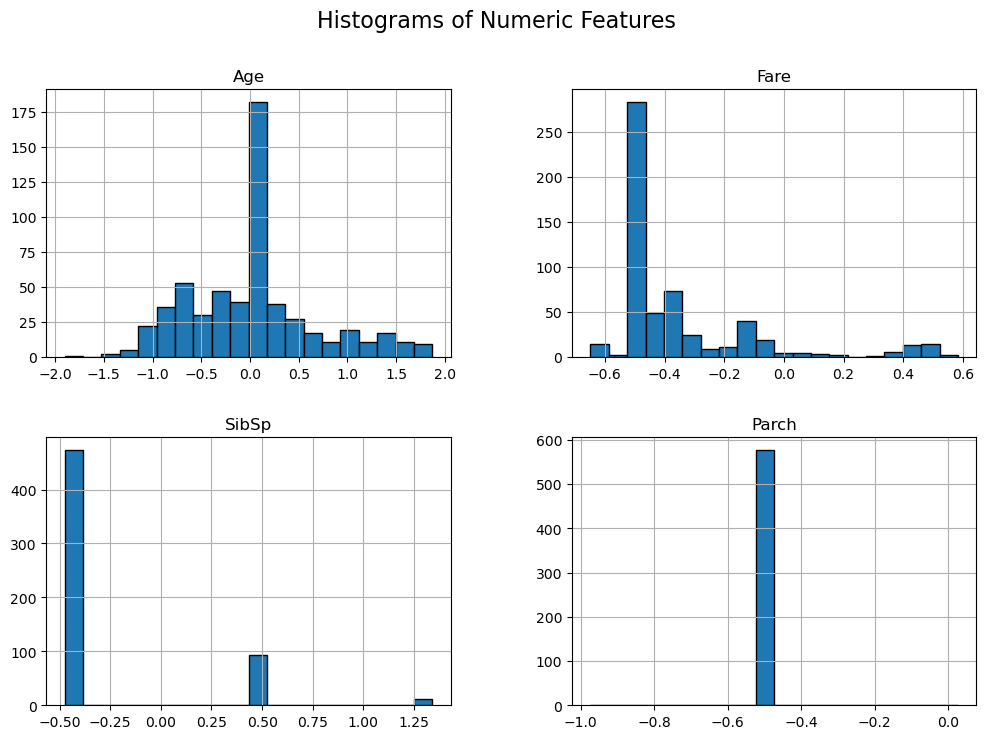

In [22]:
# Histograms
df[num_cols].hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

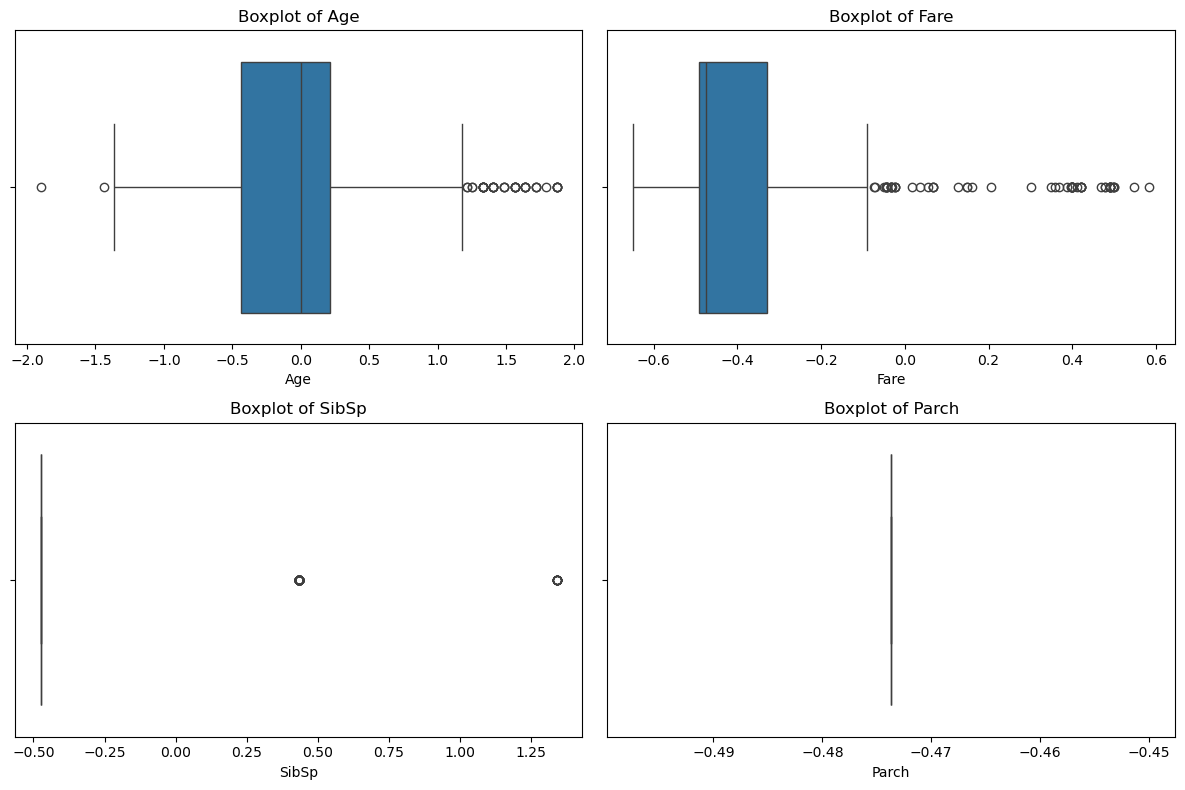

In [23]:
# Boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


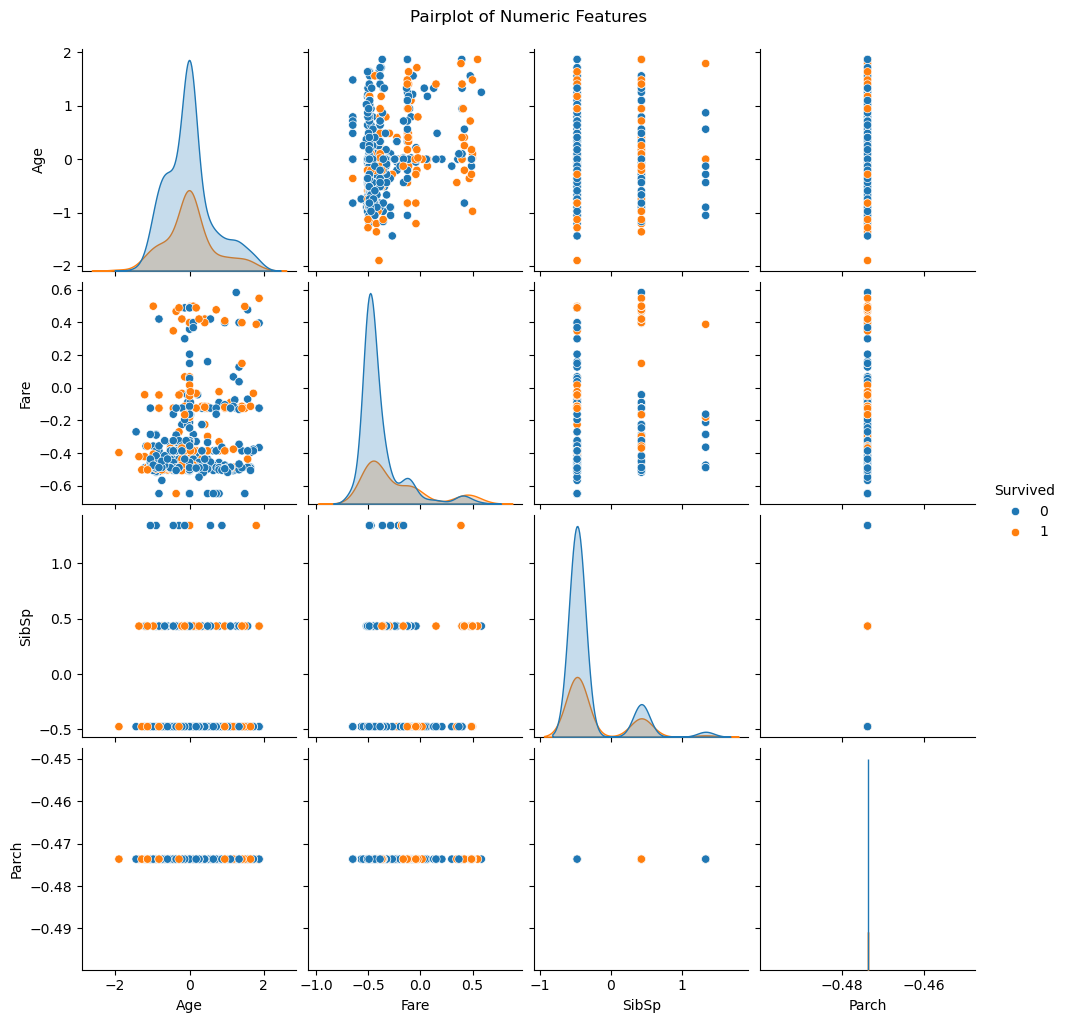

In [24]:
# Pairplot (sample to speed up if dataset is large)
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

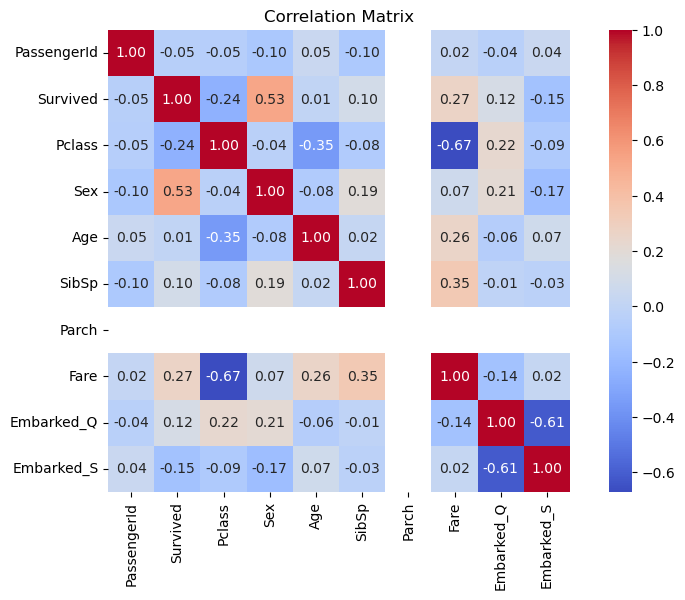

In [25]:
# Correlation matrix with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()